# Assignment A2 [40 marks]

The assignment consists of 3 exercises. Each exercise may contain coding and/or discussion questions.
- Type your **code** in the **code cells** provided below each question.
- For **discussion** questions, use the **Markdown cells** provided below each question, indicated by 📝. Double-click these cells to edit them, and run them to display your Markdown-formatted text. Please refer to the Week 1 tutorial notebook for Markdown syntax.

In [1]:
import numpy as np
from __future__ import division
import math
import matplotlib.pylab as plt
import sympy as sp
from numpy.linalg import inv
from numpy import linalg as LA
from numpy.linalg import solve

---
## Question 1: Numerical Differentiation [10 marks]

A general $N$-point finite difference approximation of the derivative $F' \left( x \right)$ of a sufficiently smooth function $F \left( x \right)$ can be written as

$$
F' \left( x \right) \approx \frac{1}{\Delta x} \sum_{i = 1}^N \alpha_i F \left( x + \beta_i \Delta x \right),
\qquad \qquad \qquad (1)
$$

with step size $\Delta x > 0$, and $\alpha_i, \beta_i \in \mathbb{Q}$, with $\beta_i \neq \beta_j$ for $i\neq j$. For example, the centred difference approximation $D_C(x)$ seen in the course has $N = 2$, and

$$
\begin{cases}
\alpha_1 = \frac{1}{2}, &\alpha_2 = -\frac{1}{2}, \\
\beta_1 = 1, &\beta_2 = -1,
\end{cases}
\qquad
\text{giving} \quad
F'(x) \approx \frac{1}{2\Delta x} \left(F\left(x + \Delta x\right) - F\left(x - \Delta x\right)\right).
$$

**1.1** Consider another finite difference approximation defined as in $(1)$, this time with $N=3$, and

$$
\begin{cases}
\alpha_1 = -\frac{4}{23}, &\alpha_2 = -\frac{9}{17}, &\alpha_3 = \frac{275}{391} \\
\beta_1 = -\frac{3}{2}, &\beta_2 = -\frac{1}{3}, &\beta_2 = \frac{4}{5}
\end{cases}.
$$

Investigate the accuracy of this approximation.

**[5 marks]**

***📝 Discussion for question 1.1***

When N = 3, apply Taylor Expansion:

$$
F'(x)=\frac{1}{\Delta x}\left[-\frac{4}{23}F\left(x-\frac{3}{2}\Delta x\right)-\frac{9}{17}F\left(x-\frac{1}{3}\Delta x\right)+\frac{275}{391}F\left(x+\frac{4}{5}\Delta x\right)+....\right]
$$

$$
=\frac{1}{\Delta x}\left[-\frac{4}{23}\left(F\left(x\right)-\frac{3}{2}\Delta xF'\left(x\right)+\frac{\frac{9}{4}\Delta x^2}{2!}F''(x)-\frac{\frac{27}{8}\Delta x^3}{3!}F'''(x)\right)\right]-\frac{1}{\Delta x}\left[\frac{9}{17}\left(F\left(x\right)-\frac{1}{3}\Delta xF'\left(x\right)+\frac{\frac{1}{9}\Delta x^2}{2!}F''(x)-\frac{\frac{1}{27}\Delta x^3}{3!}F'''(x)\right)\right]
$$

$$
+\frac{1}{\Delta x}\left[\frac{275}{391}\left(F\left(x\right)+\frac{4}{5}\Delta xF'\left(x\right)+\frac{\frac{16}{25}\Delta x^2}{2!}F''(x)+\frac{\frac{64}{125}\Delta x^3}{3!}F'''(x)\right)\right]+....=F'(x)+\frac{29}{180}\Delta x^2F'''(x)+....
$$

it clear reveals that the order of accuracy is 2.

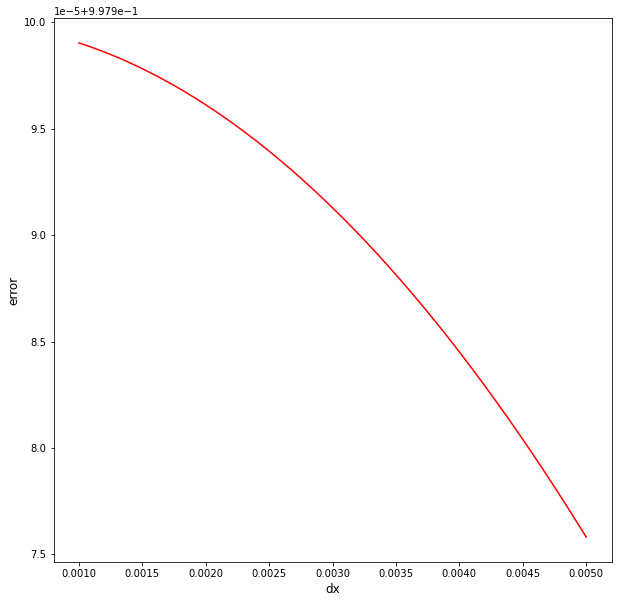

In [2]:
import numpy as np
from __future__ import division
import math
import matplotlib.pylab as plt
import sympy as sp
from numpy.linalg import inv
from numpy import linalg as LA
from numpy.linalg import solve


def F(x):
    return x**4+x**3+5*x**2+x**2+x      #define a random function F(x)
def dF(x):
    return 4*x**3+3*x**2+10*x+2         #define the derivative of F(x)

x = 0.001                               #set x
dx = np.linspace(0.001, 0.005, 1000)    #set dx
 
#calculate the difference between approximated and exact derivative
error = np.abs(((-4/23)*F(x - (3/2)*dx) + (-9/17)*F(x - (1/3)*dx) + (275/391)*F(x + (4/5)*dx))/dx - dF(x))

#sketch a graph to show the investigation
fig , ax = plt.subplots(figsize = (10, 10))
ax.set_ylabel('error', fontsize = 12)
ax.set_xlabel('dx', fontsize = 12)
ax.plot(dx, error, 'r-')
plt.show()


**1.2** For an arbitrary choice of $\beta_i$ values, what is the minimum number of points $N_{p}$ required to find an approximation $(1)$ which is at least $p$th order accurate?

*Hint:* consider the Taylor expansion of $F \left( x + \beta_i \Delta x \right)$ around $x$.

**[3 marks]**

***📝 Discussion for question 1.2***

From (1):

\begin{align}F'\left(x\right)&\approx\frac{1}{\Delta x}\sum_{i=1}^N\alpha_iF\left(x+\beta_i\Delta x\right)=\frac{1}{\Delta x}\sum_{i=1}^N\alpha_i\left(F\left(x\right)+\beta_i\Delta xF'\left(x\right)+\frac{\beta_i^2\Delta x^2}{2}F''\left(x\right)+\frac{\beta_i^3\Delta x^3}{6}F'''\left(x\right)+..\right)
\end{align}

For pth order accurate, we have (the order expected should be corresponding to the #of equations we need):
$$
F'(x)\approx\frac{1}{\Delta x} \sum_{i = 1}^N \alpha_i \left(F(x)+\beta_i\Delta x F'(x)+..+\frac{\beta_i^{p+1}\Delta x^{p+1}}{(p+1)!}F^{(p+1)} (x)+..\right)
$$
Therefore, by comparing the coefficients, we obtain a system of linear equations:

$\begin{pmatrix}
1 & 1 & 1 & ... & 1 \\
\beta_1 &\beta_2 & \beta_3 & .. &\beta_{N_p}\\
\beta_1^2 &\beta_2^2 & \beta_3^2 & .. &\beta_{N_p}^2\\
\ . & . & . & . & .\\
\ . & . & . & . & .\\
\beta_1^{p+1} &\beta_2^{p+1} & \beta_3^{p+1} & .. &\beta_{N_p}^{p+1}\\
\end{pmatrix}
\begin{pmatrix}
\alpha_1\\
\alpha_2\\
.\\
.\\
.\\
\alpha_{N_p}
\end{pmatrix}=
\begin{pmatrix}
0\\
1 \\
0\\
.\\
.\\
M
\end{pmatrix} $

We can try to approach the expected result from solving this system of equation by elimination.

**1.3** Using your reasoning from **1.2**, write a function `FD_coefficients()` which, given $N_p$ values $\beta_i$, returns $N_p$ coefficients $\alpha_i$ such that the approximation $(1)$ is at least $p$th order accurate.

Use your function to obtain the coefficients $\alpha_i$ from **1.1**.

**[2 marks]**

In [3]:
import numpy as np
from __future__ import division
import math
import matplotlib.pylab as plt
import sympy as sp
from numpy.linalg import inv
from numpy import linalg as LA
from numpy.linalg import solve

def FD_coefficients(beta):
    A = np.array([[1, 1, 1], [1, 1, -1], beta])
    b = np.array([[0], [-550/391], [1]])
    return solve(A, b)

alpha = FD_coefficients([-3/2, -1/3, 4/5])
print(f"The alphai: {alpha[0]},{alpha[1]},{alpha[2]}")

The alphai: [-0.17391304],[-0.52941176],[0.70332481]


---
## Question 2: Root Finding [10 marks]

Consider the following polynomial of cubic order,

$$
p(z) = z^3 + (c-1)z - c,
$$
where $c \in \mathbb{C}$.

This polynomial is complex differentiable, and we can apply Newton's method to find a complex root $z_\ast$, using a complex initial guess $z_0 = a_0 + ib_0$. In this problem, we seek to map the values of $z_0$ which lead to convergence to a root of $p$.

**2.1** Write a function `complex_newton(amin, amax, bmin, bmax, c, N, eps, target_roots)` which implements Newton's method to find roots of $p(z)$ using $N^2$ initial guesses $z_0 = a_0 + ib_0$. The input arguments are as follows:

- The real part $a_0$ of the initial guess should take `N` linearly spaced values between `amin` and `amax` (inclusive).
- The imaginary part $b_0$ of the initial guess should take `N` linearly spaced values between `bmin` and `bmax` (inclusive).
- `c` is the parameter $c \in \mathbb{C}$ in $p(z)$.
- `eps` is the tolerance $\varepsilon > 0$.
- `target_root` takes one of the following values:
    - if `target_root` is given as `None`, then convergence should be considered as achieved if Newton's method has converged to any root of $p$.
    - if `target_root` is given as a number, then convergence should only be considered as achieved if Newton's method has converged to the specific root $z_\ast =$ `target_root`.

Your function should return an array `kmax` of size $N \times N$, containing the total number of iterations required for convergence, for each value of $z_0$. You should decide what to do in case a particular value of $z_0$ doesn't lead to convergence.
    
Up to 2 marks will be given to solutions which iterate over each value of $z_0$. To obtain up to the full 4 marks, your implementation should be vectorised -- i.e. use a single loop to iterate Newton's method for all values of $z_0$ at once.

**[4 marks]**

In [4]:
import numpy as np
from __future__ import division
import math
import matplotlib.pylab as plt
import sympy as sp
from numpy.linalg import inv
from numpy import linalg as LA
from numpy.linalg import solve

def complex_newton(amin, amax, bmin, bmax, c, N, eps, target_root):
    a = np.linspace(amin, amax, N)      #real part
    b = np.linspace(bmin, bmax, N)      #imaginary part  
    b = b*1j                            #make b complex
    z = []                              #create a empty array to store initial guesses
    it = 0                              #number of iteration
    kmax = np.zeros((N, N))             #create a NxN empty array for kmax
    i = 0                               #fit a+bj in z array
    while i < N:
        zp = a + b[i]
        z.append(zp)
        i = i+1
    z = np.transpose(z)    
#if target_root = None:
    if target_root == None:
        while it < 100:
            z_new = z - (z**3 + (c - 1)*z - c)/(3*z**2 + c - 1)
        #convergence test
        #use a bool type to set convergence
            kmax = kmax + ~(abs(z_new - target_root) < eps)
            if (abs(z_new - target_root) < eps).all() == 1:
                break
            z = z_new                   #update for next iteration
            it = it+1
#if target_root is a number:
    elif target_root != None:
        while it < 100:
            z_new = z - (z**3 + (c - 1)*z - c)/(3*z**2 + c - 1)
        #convergence test
        #use a bool type to set convergence
            kmax = kmax + ~(abs(z_new - target_root) < eps)
            if (abs(z_new - target_root) < eps).all() == 1:
                break
            z = z_new                   #update for next iteration
            it = it+1        
    kmax[kmax >= 100] = 0
    return kmax

**2.2** For $c = 0$, $a_0 \in [-5,5]$ and $b_0 \in [-5,5]$, with at least $N = 200$ values for each (you can increase $N$ if your computer allows it), use your function `complex_newton()` to calculate, for each $z_0 = a_0 + ib_0$, the total number of iterates needed to reach a disk of radius $\varepsilon$ around the root at $z = 1$. Present your results in a heatmap plot, with $a_0$ on the abscissa, $b_0$ on the ordinate and a colour map showing the total number of iterates. 

**[3 marks]**

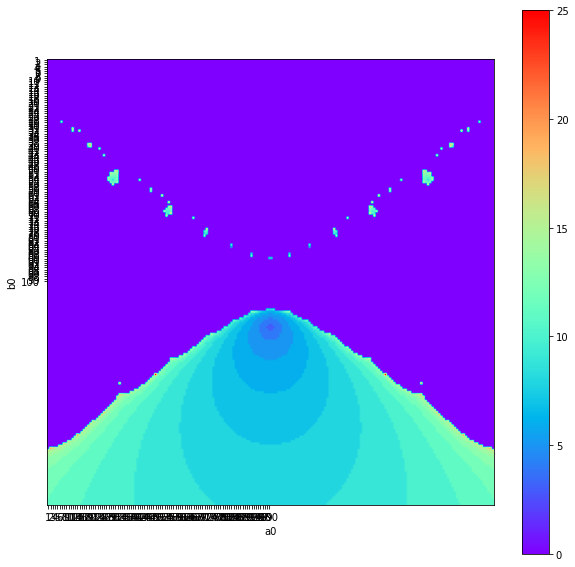

In [5]:
import numpy as np
from __future__ import division
import math
import matplotlib.pylab as plt
import sympy as sp
from numpy.linalg import inv
from numpy import linalg as LA
from numpy.linalg import solve

#reference: https://blog.csdn.net/ztf312/article/details/102474190
#reference: https://blog.csdn.net/coder_Gray/article/details/81867639
#reference: https://seaborn.pydata.org/generated/seaborn.heatmap.html
#reference: https://numpy.org/doc/stable/reference/generated/numpy.ndarray.tolist.html

def heatmap(inputt):                               #set parameters for the heat map 

    label_x = list(range(1, 101))
    label_y = list(range(1, 101))
    
    fig = plt.figure(figsize = (10, 10))           #Plot the heat map
    ax = fig.add_subplot(111)
    
    im = ax.imshow(inputt, cmap = plt.cm.rainbow)  #choose a color
    plt.colorbar(im)
    
    ax.set_yticks(range(len(label_y)))
    ax.set_yticklabels(label_y)
    ax.set_xticks(range(len(label_x)))
    ax.set_xticklabels(label_x)
    
    plt.xlabel('a0')                               #label the axis
    plt.ylabel('b0')
    plt.show()
    
#plot the heat map by given condition
heatmap(complex_newton(amin = -5, amax = 5, bmin = -5, bmax = 5, c = 0, N = 200, eps = 1e-15, target_root = 1).tolist())

**2.3** For $c = 0.32 + 1.64i$, map out the points $z_0$ for which Newton's method does not converge to any root. What does it do instead?

*Hint:* Pick a point $z_0$ in a region where Newton's method does not converge and print out, say, 50 iterates. What do you observe?

**[3 marks]**

In [6]:
import numpy as np
from __future__ import division
import math
import matplotlib.pylab as plt
import sympy as sp
from numpy.linalg import inv
from numpy import linalg as LA
from numpy.linalg import solve


def Diverge(c, z, tol):
    it = 0
    while it < 50:
        z_new = z - (z**3 + (c-1) * z - c )/(3 * z **2 + c -1)  #set z_new
        print (f"z_new:{z_new}")
        it = it+1                                               #conut iteration 
        if (abs(z_new-z))<tol:                                  #convergence condition
            break
        z = z_new                                               #update z
    return it                                                   #return iteration number to see the loop stops in which way 
tol = 1e-10                                                     #set tolerance
Diverge(0.32 + 1.64j, 0+0j, 1e-10)                              #z is randomly picked from diverged values(calculated in mathematica)


z_new:(0.784263959390863-0.5203045685279188j)
z_new:(0.0033049226648286245+0.012008341512989684j)
z_new:(0.7840168897006848-0.5203160220891067j)
z_new:(0.0018071508694664784+0.011975315281736898j)
z_new:(0.7840392900620851-0.5203702663772583j)
z_new:(0.0019352345721042052+0.011643402802573477j)
z_new:(0.7840488488791645-0.5203605947656842j)
z_new:(0.0019945107845872334+0.011700655823403072j)
z_new:(0.7840459645295986-0.5203594113671091j)
z_new:(0.0019772021329180767+0.011708232948652642j)
z_new:(0.7840459641385038-0.5203601283014411j)
z_new:(0.001977098587787829+0.01170388917901033j)
z_new:(0.7840461166912017-0.5203600657715444j)
z_new:(0.0019780317085754673+0.011704246513459471j)
z_new:(0.7840460900715929-0.5203600387818104j)
z_new:(0.0019778742323666165+0.011704413797103741j)
z_new:(0.7840460866544474-0.5203600468005238j)
z_new:(0.001977852396787272+0.011704365694944263j)
z_new:(0.7840460886584911-0.5203600468273234j)
z_new:(0.0019778645352499513+0.011704365249775694j)
z_new:(0.78404

50

***📝 Discussion for question 2.3***

The iteration keeps jumping between two points, clearly that's the reason for not convergent.

---
## Question 3: Numerical Integration of an ODE [20 marks]

Cardiac tissue is an example of an excitable medium, where a small stimulus can lead to a large response (a heart beat). The FitzHugh-Nagumo model describes the electrical activity of a single cardiac cell in terms of the transmembrane potential $u$ and a recovery variable $v$

\begin{align}
        \dot u & = f(u,v) = \frac{1}{\varepsilon} \left( u - \frac{u^3}{3} - v + I \right) \ , \\
        \dot v & = g(u,v) = \varepsilon \left( u - \gamma v + \beta \right) \ ,
\end{align}

where $I$ (a stimulus), $\varepsilon$, $\gamma$, and $\beta$ are known parameters.

The equation for $u$ leads to fast dynamics with the possibility of excitation, while the linear term proportional to $-v$ in the equation for the recovery variable produces slower dynamics and negative feedback. The FitzHugh-Nagumo model is an example of a stiff differential equation, where the stiffness becomes more pronounced for smaller $\varepsilon$.

In questions **3.1**, **3.2**, and **3.3**, we take $\varepsilon = 0.2$, $\gamma = 0.8$, and $\beta = 0.7$.


**3.1** The fixed points, defined by $\dot u = f(u, v) = 0$ and $\dot v = g(u, v) = 0$, correspond to the state of a cell at rest. Write a function `resting_state()` to determine the values $(u_I^*, v_I^*)$ for the cell in its resting state for a given value of $I$ and a given initial guess $(u_{I, 0}, v_{I, 0})$, using Newton's method.

Use your function to compute $(u_I^*, v_I^*)$ for $I=0$ and $I = 0.5$, with initial guess $(u_{I, 0}, v_{I, 0}) = (0.2, 0.2)$.


**[5 marks]**

In [7]:
import numpy as np
from __future__ import division
import math
import matplotlib.pylab as plt
import sympy as sp
from numpy.linalg import inv
from numpy import linalg as LA
from numpy.linalg import solve

def f(u,v,I):
    return (1/0.2)*(u-u**3/3-v+I)                                         #define f(u,v)

def g(u,v,I):
    gamma = 0.8 
    return 0.2*(u-gamma*v+0.7)                                            #define g(u,v)

def F(u,v,I):
    F = np.array([f(u,v,I),g(u,v,I)])                                     #combine f and g to be one list of function F
    return F

def inveJ(u,v):
    gamma = 0.8
    J = np.array([[(1/0.2)*(1-u**2),-1/0.2],[0.2,-0.2*gamma]],dtype=float) #define inverse of jacobian matrix for f(u,v) in line with g(u,v)
    return inv(J)

def G(x,I):
    return x-(inveJ(x[0],x[1])@F(x[0],x[1],I))                            #define iteration function


In [8]:
import numpy as np
from __future__ import division
import math
import matplotlib.pylab as plt
import sympy as sp
from numpy.linalg import inv
from numpy import linalg as LA
from numpy.linalg import solve

def resting_state(u0,v0,I):
    x0 = np.array([u0,v0])
    x = x0
    i = 0                                              # Set number of iteration
    tol = 1.0e-15
    while np.linalg.norm(F(x[0], x[1],I)) >= tol:      # Convergence achieved
        x_new = G(x,I)
        x = x_new                                      # Update for next iteration
        i = i+1
    res = [x,i]                                        # Return fixed points and iteration number
    return res

In [9]:
print(f"Fixed point for I=0 is:{resting_state(0.2,0.2,0)[0]}")
print(f"Fixed point for I=0.5 is:{resting_state(0.2,0.2,0.5)[0]}")

Fixed point for I=0 is:[-1.19940804 -0.62426004]
Fixed point for I=0.5 is:[-0.80484775 -0.13105968]


**3.2** Using the method of your choice **\***, compute the numerical solution $(u_n, v_n) \approx (u(n\Delta t), v(n\Delta t)), n=0, 1, 2, \dots$ for the FitzHugh-Nagumo model.

You should compute the solution for both $I = 0$ and $I = 0.5$, starting at time $t = 0$ until at least $t = 100$, with $(u_0 = 0.8, v_0 = 0.8)$ as the initial condition.

Present your results graphically by plotting

(a) $u_n$ and $v_n$ with **time** (not time step) on the x-axis,  
(b) $v_n$ as a function of $u_n$. This will show what we call the solution trajectories in *phase space*.

You should format the plots so that the data presentation is clear and easy to understand.

Given what this mathematical model describes, and given that $I$ represents a stimulus, how do you interpret your results for the two different values of $I$? Describe your observations in less than 200 words.


**\*** You may use e.g. the forward Euler method seen in Week 7 with a small enough time step, or use one of the functions provided by the `scipy.integrate` module, as seen in Quiz Q4.


**[7 marks]**

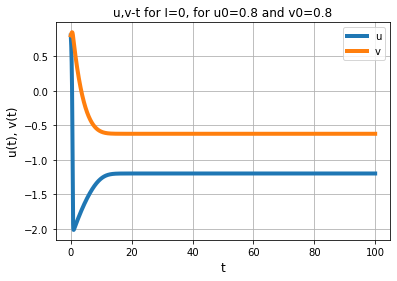

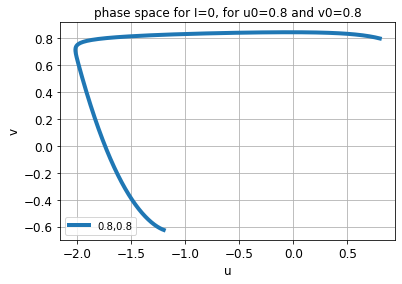

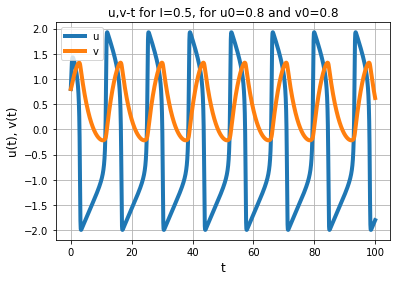

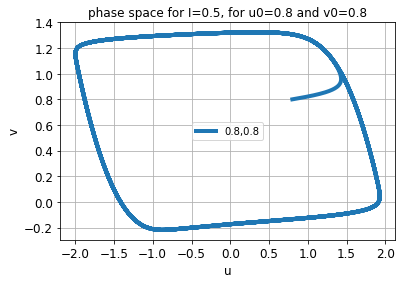

In [10]:
import numpy as np
from __future__ import division
import math
import matplotlib.pylab as plt
import sympy as sp
from numpy.linalg import inv
from numpy import linalg as LA
from numpy.linalg import solve

def PlotEulerMethod(u0,v0,I,gamma):
    Dt = 0.01               # timestep Delta t
    u_start = u0            # initial u0
    v_start = v0            # initial v0
    t_start = 0             # starttime
    t_end = 100             # endtime
    n_steps = int(round((t_end-t_start)/Dt))    # number of timesteps

    u_arr = np.zeros(n_steps + 1)   # create an array of zeros for u
    v_arr = np.zeros(n_steps +1)    # create an array of zeros for v
    t_arr = np.zeros(n_steps + 1)   # create an array of zeros for t
    t_arr[0] = t_start              
    u_arr[0] = u_start              
    v_arr[0] = v_start              

    for i in range (1, n_steps + 1):  
       u = u_arr[i-1]                      # set point for u  
       v = v_arr[i-1]                      # set point for v  
       t = t_arr[i-1]                      # set point for t  
       dudt =  5*(u-u**3/3-v+I)            # calculate the derivative of u
       dvdt =  0.2*(u-gamma*v+0.7)         # calculate the derivative of v
       u_arr[i] = u + Dt*dudt              # apply euler's iteration
       v_arr[i] = v + Dt*dvdt            
       t_arr[i] = t + Dt       

    fig = plt.figure()                     # plot the u,v-t graph             
    plt.plot(t_arr, u_arr, linewidth = 4, label = 'u')    
    plt.plot(t_arr, v_arr, linewidth = 4, label = 'v')    
    plt.title(f'u,v-t for I={I}, for u0={u0} and v0={v0}', fontsize = 12)    
    plt.xlabel('t', fontsize = 12)
    plt.ylabel('u(t), v(t)', fontsize = 12)
    plt.grid(True)                        
    plt.legend()

    fig = plt.figure()                      # plot the phase graph                             
    plt.plot(u_arr, v_arr, linewidth = 4, label = '0.8,0.8')    
    plt.title(f'phase space for I={I}, for u0={u0} and v0={v0}', fontsize = 12)                     
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.xlabel('u', fontsize = 12)
    plt.ylabel('v', fontsize = 12)
    plt.grid(True)                                              
    plt.legend()

PlotEulerMethod(0.8,0.8,0,0.8)              # plot the graphs for I=0
PlotEulerMethod(0.8,0.8,0.5,0.8)            # plot the graphs for I=0.5

***📝 Discussion for question 3.2***

Clearly, the graph for $I=0$ shows it's a stable fixed point whereas the graph for $I=0.5$ shows it's a "stable focus"(and implies a cirucular movement.)

**3.3** Compute the eigenvalues of the Jacobi matrix
        
$$
\large
\begin{pmatrix}
    \frac{\partial f}{\partial u} & \frac{\partial f}{\partial v} \\ 
    \frac{\partial g}{\partial u} & \frac{\partial g}{\partial v}
\end{pmatrix}_{u = u_I^*, v = v_I^*}
$$

evaluated at the fixed points $u = u_I^*, v = v_I^*$, for $I = 0$ and $I = 0.5$. What do you observe?

*You may use NumPy built-in functions to compute eigenvalues.*


**[3 marks]**

In [11]:
import numpy as np
from __future__ import division
import math
import matplotlib.pylab as plt
import sympy as sp
from numpy.linalg import inv
from numpy import linalg as LA
from numpy.linalg import solve

#calculate eigenvalues for I=0 at fixed point 
u = resting_state(0.2,0.2,0)[0][0]                                    #set u
v = resting_state(0.2,0.2,0)[0][1]                                    #set v
gamma=0.8                                                          
J = np.array([[(1/0.2)*(1-u**2),-1/0.2],[0.2,-0.2*gamma]],dtype=float)#set Jacobian matrix
val= LA.eigvals(J)                                                    #calculate eigenvalues
print(f"eigenvalues for I=0 at corresponding fixed point are :{val}")

#calculate eigenvalues for I=0.5 at fixed point 
u = resting_state(0.2,0.2,0.5)[0][0]                                  #reset u
v = resting_state(0.2,0.2,0.5)[0][1]                                  #reset v
J = np.array([[(1/0.2)*(1-u**2),-1/0.2],[0.2,-0.2*gamma]],dtype=float)#reset Jacobian matrix
val= LA.eigvals(J)                                                    #calculate eigenvalues
print(f"eigenvalues for I=0.5 at corresponding fixed point are :{val}")


eigenvalues for I=0 at corresponding fixed point are :[-1.35857198 -0.9943262 ]
eigenvalues for I=0.5 at corresponding fixed point are :[0.80055026+0.27810645j 0.80055026-0.27810645j]


***📝 Discussion for question 3.3***

Eigenvalues of the Jacobian matrix at $I=0$ is real and negative, showing it's a stable node.
Eigenvalues of the Jacobian matrix at $I=0$ is complex with a real real part, showing it's a unstable focus.
This is in correspondence with the gragh in 3.2

**3.4** For this question, we set $I = 0$ and $\gamma = 5$.

(a) Use the function `resting_state()` you wrote for **3.1** to find three fixed points, $(u_{(0)}^*, v_{(0)}^*)$, $(u_{(1)}^*, v_{(1)}^*)$ and $(u_{(2)}^*, v_{(2)}^*)$, using the initial conditions provided in the NumPy array `uv0` below (each row of the array constitutes a pair of initial conditions for one of the three fixed points).

(b) Compute the numerical solution $(u_n, v_n), n=0, 1, 2, \dots$ using the initial condition $(u_{(0)}^* + \delta, v_{(0)}^* + \delta)$, for $\delta \in \{0, 0.3, 0.6, 1.0\}$. This simulates the activity of a cell starting at a small perturbation $\delta$ of one of its resting states, in this case $(u_{(0)}^*, v_{(0)}^*)$.

Plot your results in a similar way as in question **3.2**, and discuss your observations in less than 150 words. In particular, does the solution always return to the same fixed point, i.e. the same resting state?

**[5 marks]**

Part a.
Fixed point for the first set of initial values is:[1.45290169 0.43058034]
Fixed point for the second set of initial values is:[0.17732319 0.17546464]
Fixed point for the third set of initial values is:[-1.63022488 -0.18604498]
Part b.


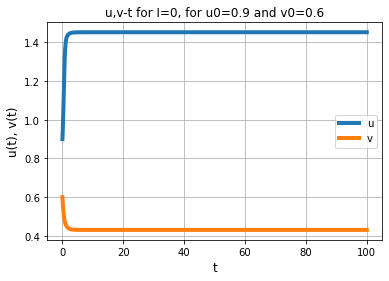

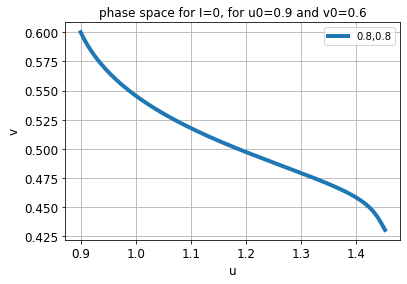

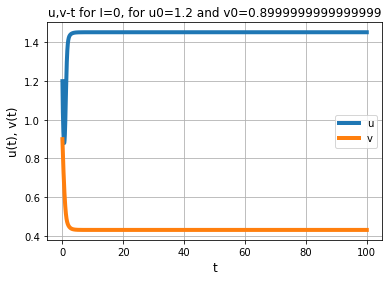

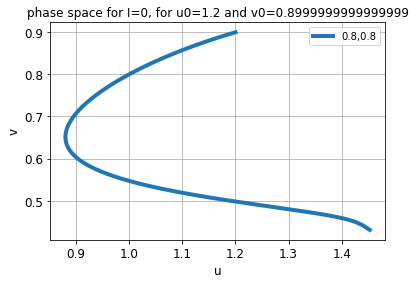

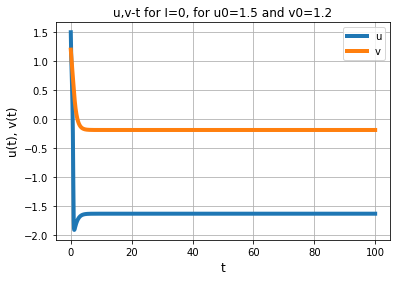

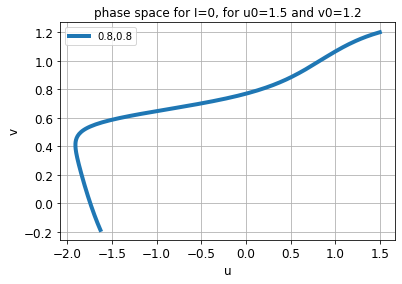

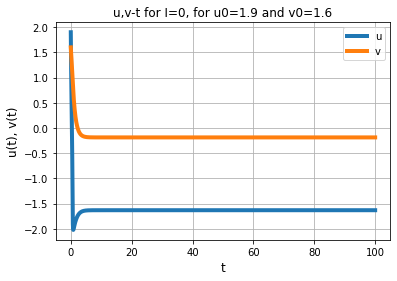

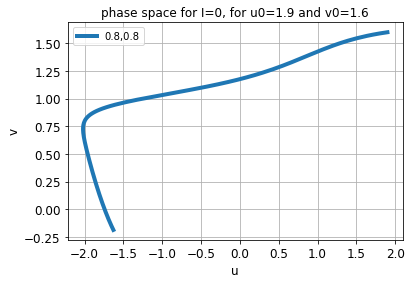

In [12]:
import numpy as np
from __future__ import division
import math
import matplotlib.pylab as plt
import sympy as sp
from numpy.linalg import inv
from numpy import linalg as LA
from numpy.linalg import solve

#modify the original functions with new gamma=5
def g(u,v,I):
    gamma = 5                                                             #modify gamma
    return 0.2*(u-gamma*v+0.7)                                            #define g(u,v)

def inveJ(u,v):
    gamma = 5                                                             #modify gamma
    J = np.array([[(1/0.2)*(1-u**2),-1/0.2],[0.2,-0.2*gamma]],dtype=float)#define inverse of jacobian matrix for f(u,v) in line with g(u,v)
    return inv(J)

# Initial conditions
uv0 = np.array([[0.9, 0.6],
                [0., 0.4],
                [-1.7, -0.3]])
print("Part a.")
print(f"Fixed point for the first set of initial values is:{resting_state(uv0[0][0],uv0[0][1],0)[0]}")
print(f"Fixed point for the second set of initial values is:{resting_state(uv0[1][0],uv0[1][1],0)[0]}")
print(f"Fixed point for the third set of initial values is:{resting_state(uv0[2][0],uv0[2][1],0)[0]}")

print("Part b.")

delta=[0,0.3,0.6,1]
for i in range (4):
    PlotEulerMethod(uv0[0][0]+delta[i],uv0[0][1]+delta[i],0,5)


***📝 Discussion for question 3.4***

We can clearly observe that there is a distinction between the result for $\delta=0$ and $\delta=0.3,0.6/1$, this implies that the solution will not always return to the same state. 